# To Do:
* ~~SED Plot~~
* ~~Table of Redshifts and calculated Luinosity Distances~~
* ~~r-i against redshift~~
* ~~z_photo against z_spec~~
* ~~Delta z/1+z against z_spec~~

Include medians and percentiles

Spectroscopic lines list: http://classic.sdss.org/dr6/algorithms/linestable.html

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.cosmology
from astropy.cosmology import Planck15 as cosmo
import scipy.stats


In [4]:
data = pd.read_csv("../../Data/PAUS_866.csv")
data['band'] = data['band'].str.slice(start=2).astype(int)
# Converts 'band' column from type string to int

In [5]:
data.columns.values

array(['ref_id_1', 'zb', 'odds', 'pz_width', 'zb_mean', 'chi2_1',
       'n_band', 'ebv', 'qz', 'best_run', 'production_id_1',
       'production_id_2', 'ref_id_2', 'band', 'flux', 'flux_error',
       'chi2_2', 'n_coadd', 'run', 'GroupID_1', 'GroupSize_1', 'paudm_id',
       'ra', 'dec', 'zp_gal', 'zl68_gal', 'zu68_gal', 'zl99_gal',
       'zu99_gal', 'zp_sec', 'dchi', 'imag', 'ei', 'i_auto', 'nbfilt',
       'mod_gal', 'type', 'umag', 'bmag', 'vmag', 'gmag', 'rmag', 'zmag',
       'icmag', 'jmag', 'kmag', 'mv', 'ebv_gal', 'ebv_int', 'acs_a_image',
       'acs_b_image', 'acs_theta_image', 'acs_mag_auto',
       'acs_magerr_auto', 'zspec', 'conf', 'f814w', 'zfits', 'r50',
       'sersic_n_gim2d', 'GroupID', 'GroupSize'], dtype=object)

# SED Plot

mag = 26-2.5*np.log10(flux)

flux = 10^[(26-mag)/2.5]

/home/andrew/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1019: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/andrew/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


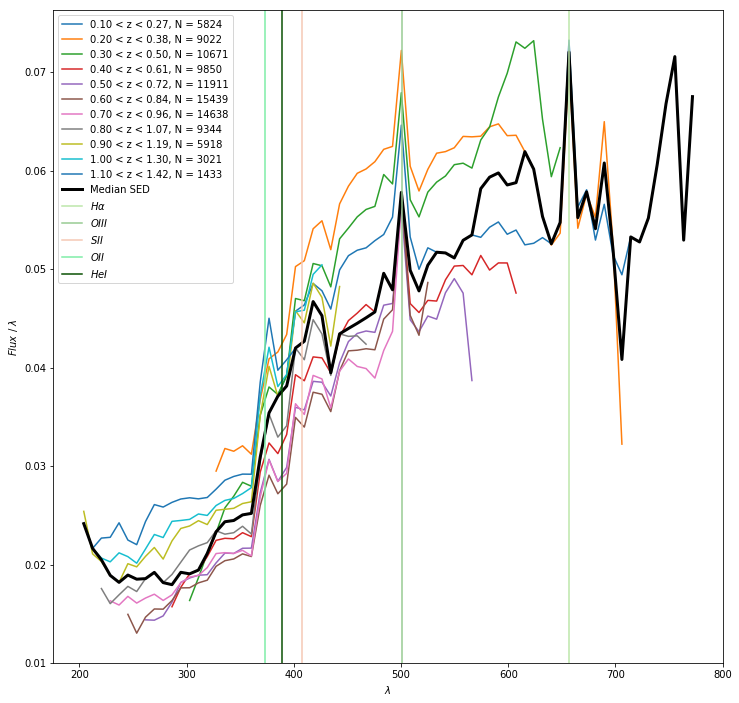

In [15]:
bins = [[0.1,0.27],[0.2,0.38],[0.3,0.5],[0.4,0.61],[0.5,0.72],[0.6,0.84],[0.7,0.96],[0.8,1.07],[0.9,1.19],[1,1.3],[1.1,1.42]]
fig = plt.figure(figsize=(12,12))

band_obsframe = data['band']/(data['zb']+1)
# print(band_obsframe.min(),band_obsframe.max())
band_bins = np.linspace(200,850,80)

# print(band_obsframe,band_bins)
all_means = []
# print(data.loc[(data['imag']==0)|(data['rmag']==0)|(data['odds']<0)]['flux'])


for z_bin in bins:
    lamb_sample = band_obsframe.loc[(data['zb'] >= z_bin[0]) & (data['zb'] <= z_bin[1])] #<---- remove rmgag=imag=0 and odds<0 results
    flux_sample = data.loc[(data['zb'] >= z_bin[0]) & (data['zb'] <= z_bin[1])]['flux']
    
#     flux_sample = 10**((26-flux_sample)/2.5) #<---- AB mag to flux conversion
    
    N_objects = data.loc[(data['zb'] >= z_bin[0]) & (data['zb'] <= z_bin[1])]['ref_id_1'].unique().size
    
    digitized = np.digitize(lamb_sample,band_bins)
    binned_means = [np.nanmedian(flux_sample[digitized == i]) for i in range(1,len(band_bins))]
    all_means.append(binned_means/(band_bins[1:]+band_bins[:-1])*2) #flux(in AB mags)/band wl
    
    
    plt.plot((band_bins[1:]+band_bins[:-1])/2,np.array(binned_means)/(band_bins[1:]+band_bins[:-1])*2,\
             label="{:.02f} < z < {:.02f}, N = {}".format(z_bin[0],z_bin[1],N_objects)) #flux(in AB mags)/500 band wl

# print(np.array(all_means))
plt.plot((band_bins[1:]+band_bins[:-1])/2,np.nanmedian(np.array(all_means),axis=0),'k-',linewidth=3,label="Median SED")

emis_lines = [[656.28,r'$H\alpha$'],[500.7,r'$OIII$'],[407.2,r'$SII$'],[372.8,r"$OII$"],[388.9,r'$HeI$']]
for line in emis_lines:
    random_ints = np.random.randint(256,size=3)
    plt.axvline(line[0],label=line[1],color='#{}{}{}'.\
                format(hex(random_ints[0])[2:].zfill(2),hex(random_ints[1])[2:].zfill(2),hex(random_ints[2])[2:].zfill(2)))

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$Flux\ /\ \lambda$')
plt.legend()
#plt.ylim([0,0.3])
#plt.xlim([200,680])
plt.show()


# Redshift Luminosity Distance Table

In [7]:
z_vals = np.linspace(0.001,1,20)
lum_distances = cosmo.luminosity_distance(z_vals)
#Uses Planck15 for cosmology

pd.DataFrame({'z':z_vals,'Luminosity Distances (MPc)':lum_distances})

,z,Luminosity Distances (MPc)
0,0.001000,4.429033
1,0.053579,246.691801
2,0.106158,506.665848
3,0.158737,783.305646
4,0.211316,1075.597522
5,0.263895,1382.567310
6,0.316474,1703.286039
7,0.369053,2036.873798
8,0.421632,2382.501986
9,0.474211,2739.394170


# r-i against Redshift

In [8]:
def ub68(x):
    return np.percentile(x,50+34.1)

def lb68(x):
    return np.percentile(x,50-34.1)

/home/andrew/.local/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/home/andrew/.local/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/home/andrew/.local/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this

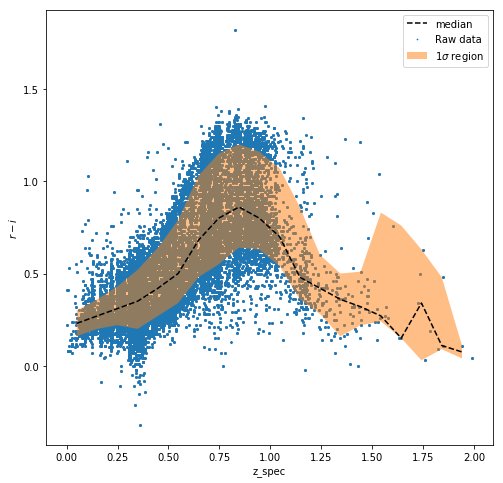

In [9]:
colour_r_i = data['rmag'] - data['imag']
colour_r_i = colour_r_i.loc[(data['rmag']!=0) & (data['imag']!=0) & (data['zspec']!=0) & (data.zspec.notnull())]
z_spec = data.loc[(data['rmag']!=0) & (data['imag']!=0) & (data['zspec']!=0) & (data.zspec.notnull())]['zspec'] #<------ Cutting null values

#ignore outliers
colour_r_i, z_spec = colour_r_i.loc[z_spec<2], z_spec.loc[z_spec<2]

bins = 20
medians, bins, bininds = scipy.stats.binned_statistic(z_spec,colour_r_i,'median',bins)
lbs = scipy.stats.binned_statistic(z_spec,colour_r_i,lb68,bins)[0]
ubs = scipy.stats.binned_statistic(z_spec,colour_r_i,ub68,bins)[0]


plt.figure(figsize=(8,8))
plt.scatter(z_spec, colour_r_i, s=0.5,zorder=5,label='Raw data')
plt.fill_between((bins[1:]+bins[:-1])/2,lbs,ubs,alpha=0.5,zorder=10,label=r'1$\sigma$ region')
plt.plot((bins[1:]+bins[:-1])/2,medians,'k--',zorder=15,label='median')
plt.xlabel('z_spec')
plt.ylabel(r'$r-i$')
plt.legend()
plt.show()

# Z_spec against Z_photo

/home/andrew/.local/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/home/andrew/.local/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


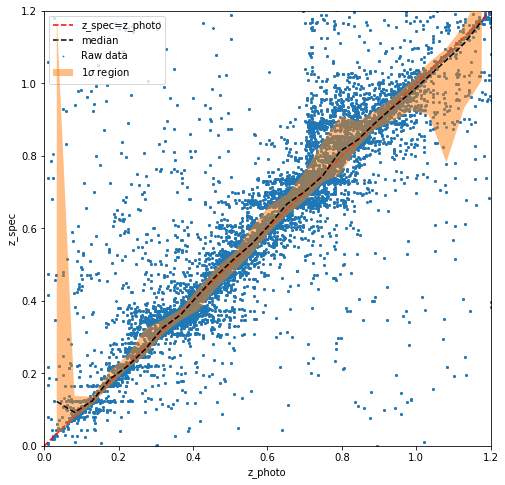

In [13]:
z_s, z_p = data.loc[(data['zspec']!=0)&(data['zb']!=0)&(data.zspec.notnull())]['zspec'],\
           data.loc[(data['zspec']!=0)&(data['zb']!=0)&(data.zspec.notnull())]['zb']

bins = 25
medians, bins, bininds = scipy.stats.binned_statistic(z_p,z_s,'median',bins)
lbs = scipy.stats.binned_statistic(z_p,z_s,lb68,bins)[0]
ubs = scipy.stats.binned_statistic(z_p,z_s,ub68,bins)[0]

plt.figure(figsize=(8,8))
plt.scatter(z_p,z_s, s=0.5,label='Raw data')
plt.plot([0,1.2],[0,1.2],'r--',label='z_spec=z_photo')
plt.fill_between((bins[1:]+bins[:-1])/2,lbs,ubs,alpha=0.5,zorder=10,label=r'1$\sigma$ region')
plt.plot((bins[1:]+bins[:-1])/2,medians,'k--',zorder=15,label='median')

plt.ylabel('z_spec')
plt.xlabel('z_photo')
plt.legend()
#plt.axes().set_aspect('equal', 'datalim')
plt.xlim([0,z_p.max()]) #zp.max() = 1.2
plt.ylim([0,z_p.max()])
plt.show()

# Delta z / (1+z) against z_spec

### Using data from above plot!!!

/home/andrew/.local/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/home/andrew/.local/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


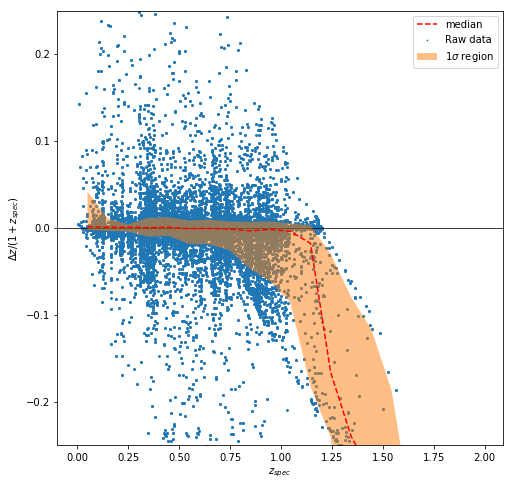

In [14]:
deltaz_normed = (z_p - z_s)/(1+z_s)

# Do data cut for z<2
deltaz_normed = deltaz_normed.loc[z_s<2]
z_s = z_s.loc[z_s<2]


plt.figure(figsize=(8,8))
plt.scatter(z_s,deltaz_normed, s=0.5,label='Raw data')

bins = 20
medians, bins, bininds = scipy.stats.binned_statistic(z_s,deltaz_normed,'median',bins)
lbs = scipy.stats.binned_statistic(z_s,deltaz_normed,lb68,bins)[0]
ubs = scipy.stats.binned_statistic(z_s,deltaz_normed,ub68,bins)[0]

plt.fill_between((bins[1:]+bins[:-1])/2,lbs,ubs,alpha=0.5,zorder=10,label=r'1$\sigma$ region')
plt.plot((bins[1:]+bins[:-1])/2,medians,'r--',zorder=15,label='median')

plt.axhline(0,color='black',linewidth=0.75)
plt.ylabel(r'$\Delta z / (1+z_{spec})$')
plt.xlabel(r'$z_{spec}$')
plt.legend()
#plt.axes().set_aspect('equal', 'datalim')
#plt.xlim([0,z_p.max()]) #zp.max() = 1.2
plt.ylim([-0.25,0.25])
plt.show()